# Лабораторне заняття №7

# Перетворення випадкових величин
На цьому занятті ми реалізуємо перетворення випадкових величин із розглянутих раніше розподілів, які реалізовані в бібліотеці [SciPy](https://docs.scipy.org/doc/scipy/reference/).
Із цього пакету будемо використовувати клас [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html), в якому реалізована велика кількість імовірнісних розподілів і статистичних функцій.

Для візуалізації використаємо бібліотеку [Matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

Справедливі два твердження про квантильне перетворення:
1. Нехай випадкова величина $\xi$ має неперервну функцію розподілу $F$.
Тоді випадкова величина $\eta = F(\xi)$ має стандартний рівномірний розподіл:
$F(\xi) \sim Unif(0, 1)$.
2. Нехай $F$ - неперервна функція розподілу,
випадкова величина $\eta$ має стандартний рівномірний розподіл: $\eta \sim Unif(0, 1)$.
Тоді випадкова величина $\xi = F^{-1}(\eta)$ має функцію розподілу $F$.

### 1.1 Експоненційний розподіл

Реалізуйте перше твердження про квантильне перетворення для випадкової величини $\xi \sim Exp(1)$ з функцією розподілу $F$:
- згенеруйте $n = 10000$ значень випадкової величини $\xi$;
- отримайте $n = 10000$ значень випадкової величини $F(\xi)$;
- намалюйте нормовану гістограму отриманих $n = 10000$ значень випадкової величини $F(\xi)$;
- намалюйте щільність стандартного рівномірного розподілу на тому ж графіку.

Порівняйте форму нормованої гістограми та функції щільності.

Що відбувається при збільшенні (зменшенні) кількості випадкових значень $n$?

C:\Users\yesval\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


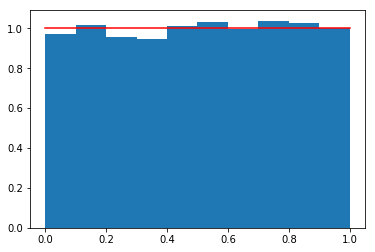

In [2]:
# Місце для Вашого коду
from scipy.stats import expon, uniform
xi=expon()
eta=uniform()
xi_rvs=xi.rvs(10000)
f_xi_rvs=xi.cdf(xi_rvs)
plt.hist(f_xi_rvs, normed=True)
x=np.arange(0, 1.01, 0.01)
y=eta.pdf(x)
plt.plot(x, y, 'r')
plt.show()

Реалізуйте друге твердження про квантильне перетворення для випадкової величини $\xi \sim Exp(1)$ з функцією розподілу $F$:
- згенеруйте $n = 10000$ значень випадкової величини $\eta \sim Unif(0, 1)$;
- обчисліть функцію обернену до функції розподілу випадкової величини $\xi$;
- отримайте $n = 10000$ значень випадкової величини $F^{-1}(\eta)$;
- намалюйте нормовану гістограму отриманих $n = 10000$ значень випадкової величини $F^{-1}(\eta)$;
- намалюйте щільність випадкової величини $\xi$ на тому ж графіку.

Порівняйте форму нормованої гістограми та функції щільності.

Що відбувається при збільшенні (зменшенні) кількості випадкових значень $n$?

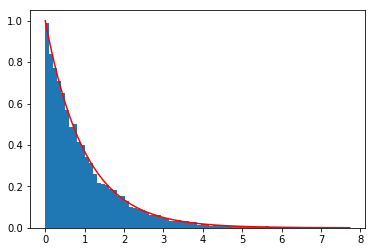

In [8]:
# Місце для Вашого коду
#$$F(x)=1-\exp\{-x}$$
#$$y=1-exp(-x)$$
#F^(-1)(y)=x=-log(11-y)

xi=expon()
eta=uniform()
xi_rvs=eta.rvs(10000)
f_xi_rvs=-np.log(1-xi_rvs)
plt.hist(f_xi_rvs, normed=True, bins='auto')
x=np.arange(0, max(f_xi_rvs)+0.01, 0.01)
y=xi.pdf(x)
plt.plot(x, y, 'r')
plt.show()


### 1.2 Квантиль

Нехай $F$ - функція розпділу деякої випадкової величини $\xi$, $\alpha \in [0, 1]$.

Квантиль рівня $\alpha$ - це таке число $x_{\alpha}$, що
$$F \left(x_{\alpha}\right) = \mathsf{P}\left(\xi < x_{\alpha}\right) = \alpha.$$

Інший варіант визначення. Нехай $Q(\alpha)$ - це квантиль рівня $\alpha$. Тоді
$$Q(\alpha) = \inf \left\{ x \in \mathbb{R} \, \colon \, \alpha < F(x) \right\}.$$

Якщо $F$ - неперервна та строго зростає, то
$$Q = F^{-1}.$$

Для розподілів із класу **scipy.stats** функція квантилю реалізована методом **ppf**.

Наприклад, для експоненційного розподілу маємо (детальна інформація в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html)):

In [3]:
from scipy.stats import expon

q = np.arange(0, 1.1, 0.1)
f_q = expon.ppf(q, loc=0, scale=1)
print(f_q)

qq = expon.cdf(f_q, loc=0, scale=1)
print(qq)

[0.         0.10536052 0.22314355 0.35667494 0.51082562 0.69314718
 0.91629073 1.2039728  1.60943791 2.30258509        inf]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Для випадкової величини $\xi \sim Exp(1)$ застосуйте метод **ppf** до згенерованих раніше $n = 10000$ значень випадкової величини $\eta \sim Unif(0, 1)$.
Порівняйте ці значення з отриманими раніше $n = 10000$ значеннями випадкової величини $F^{-1}(\eta)$ за допомогою оберненої функції розподілу, яку Ви обчислювали.

**Зауваження.** В прикладі нижче:
- `xi` - це випадкова величина зі стандартного експоненційного розподілу ($\lambda = 1$);
- `eta_rvs` - $10000$ випадкових значень зі стандартного рівномірного розподілу;
- `f_eta_rvs` - значення оберненої до функції розподілу стандартного експоненційного розподілу в точках `eta_rvs`.

In [4]:
print("Number of different values = {}".format(sum(f_eta_rvs != xi.ppf(eta_rvs))))
print("Number of values that differ more than 10^{} = {}".format("{-10}", sum(f_eta_rvs - xi.ppf(eta_rvs) > 10**(-10))))

NameError: name 'f_eta_rvs' is not defined

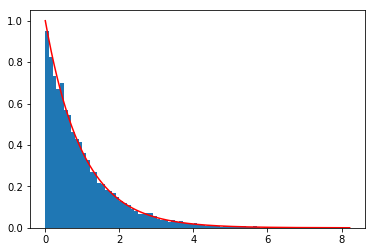

In [9]:
# Місце для Вашого коду
xi=expon()
eta=uniform()
xi_rvs=eta.rvs(10000)
f_xi_rvs=xi.ppf(xi_rvs)
plt.hist(f_xi_rvs, normed=True, bins='auto')
x=np.arange(0, max(f_xi_rvs)+0.01, 0.01)
y=xi.pdf(x)
plt.plot(x, y, 'r')
plt.show()


Реалізуйте друге твердження про квантильне перетворення для випадкової величини $\xi \sim Exp(1)$ з використанням вбудованого методу квантильної функції:
- візьміть згенеровані раніше $n = 10000$ значень випадкової величини $\eta \sim Unif(0, 1)$;
- отримайте $n = 10000$ значень випадкової величини $F^{-1}(\eta)$ за допомогою методу **ppf**;
- намалюйте нормовану гістограму отриманих $n = 10000$ значень випадкової величини $F^{-1}(\eta)$;
- намалюйте щільність випадкової величини $\xi$ на тому ж графіку.

Порівняйте даний графік з отриманим раніше.

In [ ]:
# Місце для Вашого коду



## 2 Модуль від випадкової величини

### 2.1 Нормальний розподіл

Розглянемо випадкову величину $\xi$ зі стандартного нормального розподілу.
Тобто $\xi \sim N(0, 1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $|\xi|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $|\xi|$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $|\xi|$.

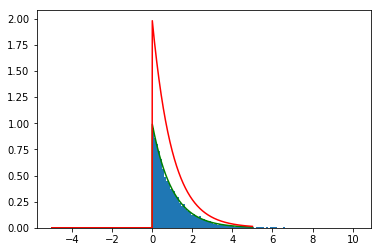

In [13]:
# Місце для Вашого коду
xi=expon()
#eta=uniform()



x=np.arange(-5, 5+0.01, 0.01)
y=xi.pdf(x)
xi_rvs=xi.rvs(10000)
f_xi_rvs=np.abs(xi_rvs)
plt.hist(f_xi_rvs, normed=True, bins='auto')
def f(x):
    return[0 if el<0 else 2*xi.pdf(el) for el in x]
plt.plot(x, y, 'g')
plt.plot(x, f(x), 'r')

plt.show()


### 2.2 Рівномірний розподіл

Розглянемо випадкову величину $\xi$ з рівномірного розподілу на $[-1, 4]$.
Тобто $\xi \sim Unif(-1, 4)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $|\xi|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $|\xi|$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $|\xi|$.

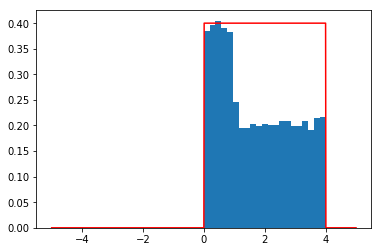

In [18]:
# Місце для Вашого коду

# Місце для Вашого коду
xi=uniform(loc=-1, scale=5)
#eta=uniform()



x=np.arange(-5, 5+0.01, 0.01)
y=xi.pdf(x)
xi_rvs=xi.rvs(10000)
f_xi_rvs=np.abs(xi_rvs)
plt.hist(f_xi_rvs, normed=True, bins='auto')

#plt.plot(x, y, 'g')
plt.plot(x, f(x), 'r')

plt.show()


### 2.3 Експоненційний розподіл

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $|\xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $|\xi - 1|$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $|\xi - 1|$.

In [ ]:
# Місце для Вашого коду



## 3 Квадрат від випадкової величини

### 3.1 Рівномірний розподіл

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\xi^2$ (застосуйте функцію піднесення до квадрата до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\xi^2$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi^2$.

In [ ]:
# Місце для Вашого коду



### 3.2 Нормальний розподіл

Розглянемо випадкову величину $\xi$ зі стандартного нормального розподілу.
Тобто $\xi \sim N(0, 1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\xi^2$ (застосуйте функцію піднесення до квадрата до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\xi^2$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi^2$;
   - функцію щільності випадкової величини $\eta \sim \chi^2_1$;
   - функцію щільності випадкової величини $\eta \sim \Gamma(1/2, 1/2)$.

In [ ]:
# Місце для Вашого коду



## 4 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) \geq 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$.

In [ ]:
# Місце для Вашого коду



## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [ ]:
# Місце для Вашого коду



Знайдіть функцію щільності випадкової величини $\xi_1 = x + y$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

In [ ]:
# Місце для Вашого коду



Знайдіть функцію щільності випадкової величини $\xi_2 = xy$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

In [ ]:
# Місце для Вашого коду



Знайдіть функцію щільності випадкової величини $\xi_3 = \min (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

In [ ]:
# Місце для Вашого коду

